# Tool function signature 

check if "is_format_of" relation in edam are confirmed in bio.tools

In [17]:
from rdflib import ConjunctiveGraph
from SPARQLWrapper import SPARQLWrapper, JSON
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML



import pandas as pd

def remoteQuery(query, endpoint):
    endpoint.setQuery(query)
    try:
        result = endpoint.queryAndConvert()
        pd.set_option("display.max_rows",None,"display.max_colwidth",6000,"display.width",6000,)
        df = pd.DataFrame(result['results']['bindings'])
        df = df.applymap(lambda x: x['value'])
        return df
        #return (result['results']['bindings'])
    except Exception as e:
        print(e)

ep_biotools = SPARQLWrapper("http://localhost:7200/repositories/Project25")
ep_biotools.setReturnFormat(JSON)

In [30]:
query_edam = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT  ?format ?data  WHERE {

?format rdfs:subClassOf ?restriction . 
?restriction rdf:type owl:Restriction ; 
   owl:onProperty  edam:is_format_of ; 
   owl:someValuesFrom ?data.
}
ORDER BY ASC(?format)

"""
query_both = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT  ?format ?data  WHERE {

?biotools_id rdf:type sc:SoftwareApplication.
{?biotools_id bsc:input [sc:additionalType ?data];
               bsc:input [sc:encodingFormat ?format].}
UNION
{?biotools_id bsc:output [sc:additionalType ?data];
               bsc:output [sc:encodingFormat ?format].}

?format rdfs:subClassOf ?restriction . 
?restriction rdf:type owl:Restriction ; 
   owl:onProperty  edam:is_format_of ; 
   owl:someValuesFrom ?data.
}
ORDER BY ASC(?format)

"""
query_bt = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT  ?format ?data  WHERE {

?biotools_id rdf:type sc:SoftwareApplication.
{?biotools_id bsc:input [sc:additionalType ?data];
               bsc:input [sc:encodingFormat ?format].}
UNION
{?biotools_id bsc:output [sc:additionalType ?data];
               bsc:output [sc:encodingFormat ?format].}

}
ORDER BY ASC(?format)

"""

nb tot format = 618

In [31]:
results_edam=remoteQuery(query=query_edam, endpoint=ep_biotools)
print(len(results_edam))

display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results_edam.to_html() +
             "</div>"))


732


,format,data
0,http://edamontology.org/format_1196,http://edamontology.org/data_0846
1,http://edamontology.org/format_1197,http://edamontology.org/data_0846
2,http://edamontology.org/format_1198,http://edamontology.org/data_0846
3,http://edamontology.org/format_1199,http://edamontology.org/data_0846
4,http://edamontology.org/format_1200,http://edamontology.org/data_0846
5,http://edamontology.org/format_1206,http://edamontology.org/data_2044
6,http://edamontology.org/format_1207,http://edamontology.org/data_2044
7,http://edamontology.org/format_1208,http://edamontology.org/data_2044
8,http://edamontology.org/format_1209,http://edamontology.org/data_2044
9,http://edamontology.org/format_1210,http://edamontology.org/data_2044


In [32]:
results_both=remoteQuery(query=query_both, endpoint=ep_biotools)
print(len(results_both))

display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results_both.to_html() +
             "</div>"))

137


,format,data
0,http://edamontology.org/format_1212,http://edamontology.org/data_2044
1,http://edamontology.org/format_1333,http://edamontology.org/data_0857
2,http://edamontology.org/format_1360,http://edamontology.org/data_1353
3,http://edamontology.org/format_1369,http://edamontology.org/data_1364
4,http://edamontology.org/format_1370,http://edamontology.org/data_1364
5,http://edamontology.org/format_1423,http://edamontology.org/data_0870
6,http://edamontology.org/format_1457,http://edamontology.org/data_0880
7,http://edamontology.org/format_1476,http://edamontology.org/data_3870
8,http://edamontology.org/format_1476,http://edamontology.org/data_0883
9,http://edamontology.org/format_1477,http://edamontology.org/data_0883


In [33]:
results_bt=remoteQuery(query=query_bt, endpoint=ep_biotools)
print(len(results_bt))

display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results_bt.to_html() +
             "</div>"))

3115


,format,data
0,http://edamontology.org/format_1196,http://edamontology.org/data_0990
1,http://edamontology.org/format_1196,http://edamontology.org/data_1463
2,http://edamontology.org/format_1196,http://edamontology.org/data_1460
3,http://edamontology.org/format_1196,http://edamontology.org/data_2976
4,http://edamontology.org/format_1196,http://edamontology.org/data_1009
5,http://edamontology.org/format_1196,http://edamontology.org/data_2646
6,http://edamontology.org/format_1196,http://edamontology.org/data_0883
7,http://edamontology.org/format_1196,http://edamontology.org/data_2301
8,http://edamontology.org/format_1196,http://edamontology.org/data_0925
9,http://edamontology.org/format_1196,http://edamontology.org/data_1150


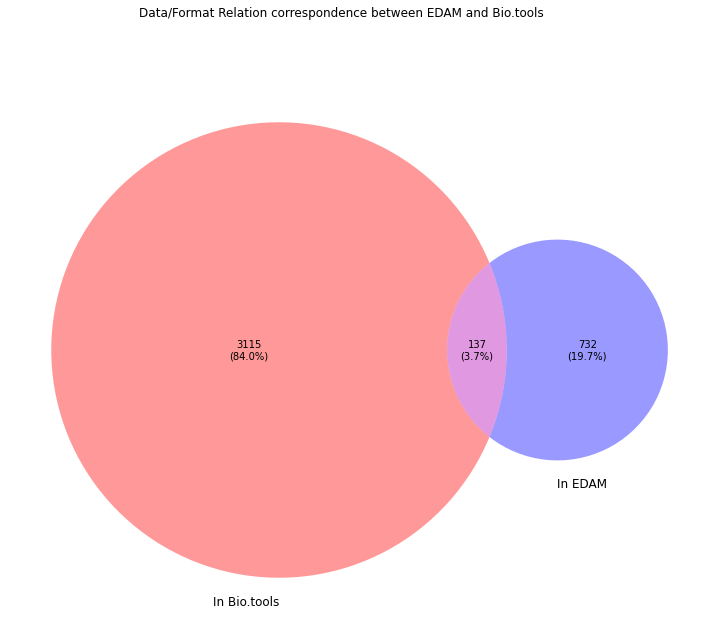

In [45]:
from matplotlib_venn import venn2

fig = plt.figure(figsize = (20, 10))
fig.patch.set_facecolor('xkcd:white')
fig.suptitle("Data/Format Relation correspondence between EDAM and Bio.tools")

size=len(results_bt)-len(results_both)+len(results_edam)

v=venn2(subsets=(len(results_bt)-len(results_both),len(results_edam)-len(results_both), len(results_both)), set_labels=('In Bio.tools', 'In EDAM'), set_colors=("red", "blue"))
v.get_label_by_id('100').set_text(f"{len(results_bt)}\n({len(results_bt)/size*100:.1f}%)")
v.get_label_by_id('010').set_text(f"{len(results_edam)}\n({len(results_edam)/size*100:.1f}%)")
v.get_label_by_id('110').set_text(f"{len(results_both)}\n({len(results_both)/size*100:.1f}%)")
